<a href="https://colab.research.google.com/github/xainse/ml-internship/blob/main/Onix_Internship%2C_ML_Lesson_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Read a csv-file into DataFrame
from pandas import read_csv

# Split arrays or matrices into train and test subsets
from sklearn.model_selection import train_test_split

# Mean absolute error regression loss
from sklearn.metrics import mean_absolute_error

# Apply a power transform featureswise to make data more Gausian-like.
from sklearn.preprocessing import PowerTransformer 

# A Sequential model is appropriate for a plain stack of layers where each 
# layer has exactly one input tensor and one output tensor. 
from keras import Sequential

# Dense - regular densely-connected NN layer.
# Applies Dropout to the input. 
from keras.layers import Dense, Dropout 

# matplotlib.pyplot is a collection of functions that
# make matplotlib works lite MATLAB.
from matplotlib import pyplot as plt

In [ ]:
# Google drive mount
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load dataset
dir_name = "/content/drive/MyDrive/2022.01. ML Learning - Onix Internship (Serhii Kholin)/Lesson_017/"

df = read_csv(dir_name + "dataset.csv")
df

,position,intention,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


In [ ]:
df.describe()

,position,intention,success
count,297.000000,297.000000,297.000000
mean,23.709718,46.986527,0.569024
std,8.864000,21.956447,0.496049
min,2.347560,-0.852800,0.000000
25%,17.002148,28.689067,0.000000
50%,23.283644,45.695926,1.000000
75%,30.661149,65.171876,1.000000
max,45.773729,97.175508,1.000000


In [ ]:
# Split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]


input = df.drop(['success'], axis=1)
target = df.drop(['position', 'intention'], axis=1)

# y_train, y_test - це цільові дані
x_train_unscaled, x_test_unscaled, y_train, y_test = train_test_split(input, target, train_size = 0.8)

# Step 4
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train_unscaled)
x_train = scaler.transform(x_train_unscaled)
x_test = scaler.transform(x_test_unscaled)

print(x_train[:3])
print(y_train[:3])

#print(x_train_unscaled)


[[ 1.33612906 -0.82707296]
 [ 0.19347841  1.99892713]
 [ 1.24370413 -0.53399297]]
     success
52       1.0
295      1.0
195      1.0


In [ ]:
# Power transform input data
k = []
pt1 = PowerTransformer()
pt1.fit(x_train)
x_train = pt1.transform(x_train)
x_test = pt1.transform(x_test)

# Determine the number of input features
n_features = X.shape[1]

print(x_train[:3])
print(y_train[:3])
print(n_features)

[[ 1.32634879 -0.817661  ]
 [ 0.20575194  1.8803908 ]
 [ 1.23660654 -0.50087574]]
     success
52       1.0
295      1.0
195      1.0
2


In [ ]:
import tensorflow as tf

# Define model
model = tf.keras.Sequential()


model.add(Dense(28,
                activation='relu',
                kernel_initializer='he_normal',
                input_shape=(2,)))
model.add(Dense(20,
                activation='relu',
                kernel_initializer='he_normal')) # the way to set the initial
                                                 # random weights of Keras layers.
                                                 # He normal initializer.
                                                 # It draws samples from a truncated
                                                 # normal distribution.
model.add(Dropout(0.05))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
# Fit the model

In [ ]:

history = model.fit(x_train, output, verbose=2)


InvalidArgumentError: ignored

NameError: ignored

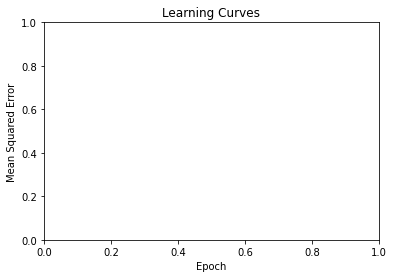

In [ ]:
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [ ]:
# Predict test set
y_pred = model.predict(x_test)

# Inverser transforms on target variable
y_test = pt2.inverse_transform(y_test)
y_pred = pt2.inverse_transform(y_pred)

plt.plot(y_test, 'g*-', y_pred, 'ro-')
plt.show()

In [ ]:
# evaluate predictions
score = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % score)